In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [63]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [23]:
# Load data
root = '/home/tc/OneDrive/Software/MSFiltration/experiments/'

with open(root+'stability_sbm_04-28_21:14.pkl', 'rb') as handle:
    results_sbm = pickle.load(handle)

persistence_sbm = results_sbm['persistence']
bottleneck_sbm = results_sbm['bottleneck']
wasserstein_sbm = results_sbm['wasserstein']

with open(root+'stability_er_04-29_15:45.pkl', 'rb') as handle:
    results_er = pickle.load(handle)

persistence_er = results_er['persistence']
bottleneck_er = results_er['bottleneck']
wasserstein_er = results_er['wasserstein']

In [20]:
print('### 100 SBM realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_sbm[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_sbm[:,:,i].mean(),5))
    
print('\n### 100 ER realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_er[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_er[:,:,i].mean(),5))
    

### 100 SBM realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.38591
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  0.18843
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.00338
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise Wasserstein distance for 0-dimensional Dgm:  1.52728
Mean pair-wise Wasserstein distance for 1-dimensional Dgm:  0.75189
Mean pair-wise Wasserstein distance for 2-dimensional Dgm:  0.00348
Mean pair-wise Wasserstein distance for 3-dimensional Dgm:  0.0

### 100 ER realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.1415
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise Wasserstein distance for 0-dimensional Dgm:  1.37634
Mean pair-wise Wasserstein distance for 1-dimensional Dgm:  35.94135
Mean pair-wise Was

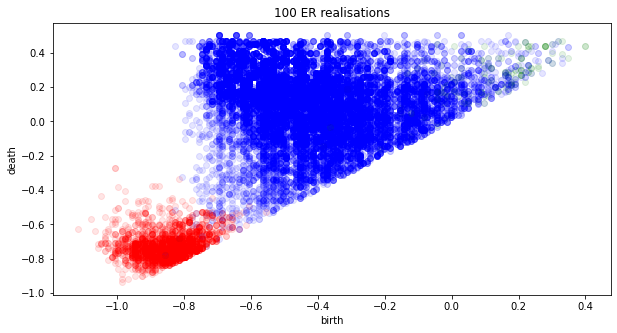

In [64]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for i in range(100):

    ax.scatter(persistence_er[i][0][:,0],persistence_er[i][0][:,1], color = 'red', alpha=0.1)
    ax.scatter(persistence_er[i][1][:,0],persistence_er[i][1][:,1], color = 'blue', alpha=0.1)
    ax.scatter(persistence_er[i][2][:,0],persistence_er[i][2][:,1], color = 'green', alpha=0.1)

ax.set(xlabel='birth', ylabel = 'death', title='100 ER realisations')
plt.savefig(root_fig +'stability_er.pdf', dpi=fig.dpi,bbox_inches='tight')

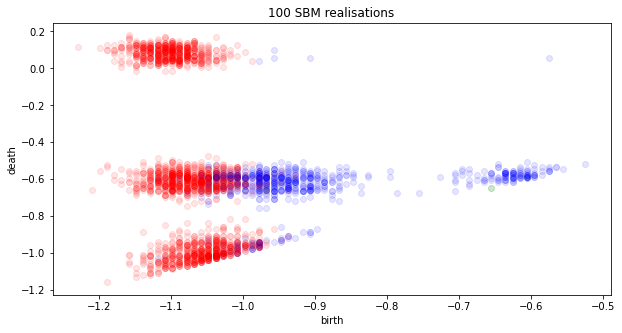

In [65]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for i in range(100):

    plt.scatter(persistence_sbm[i][0][:,0],persistence_sbm[i][0][:,1], color = 'red', alpha=0.1)
    plt.scatter(persistence_sbm[i][1][:,0],persistence_sbm[i][1][:,1], color = 'blue', alpha=0.1)
    plt.scatter(persistence_sbm[i][2][:,0],persistence_sbm[i][2][:,1], color = 'green', alpha=0.1)

ax.set(xlabel='birth', ylabel = 'death', title='100 SBM realisations')
plt.savefig(root_fig +'stability_sbm.pdf', dpi=fig.dpi,bbox_inches='tight')